In [1]:
import os
import sys

from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for AWS compute node
rm -rf "/shared/CSHL_data_processed/MD653/MD653_prep2_thumbnail/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_prep2_thumbnail.tif" && mkdir -p "/shared/CSHL_data_processed/MD653/MD653_prep2_thumbnail"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_prep2_thumbnail/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_prep2_thumbnail.tif" "/shared/CSHL_data_processed/MD653/MD653_prep2_thumbnail/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_prep2_thumbnail.tif"
rm -rf "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif" && mkdir -p "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif" "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif"
rm -rf "/shared/CSHL_da

In [2]:
from skimage.filters import median, gaussian, threshold_otsu
from skimage.morphology import disk, remove_small_objects, binary_closing
from skimage.measure import label, regionprops
from skimage.exposure import rescale_intensity

In [3]:
metadata_cache['valid_filenames']['MD662']

['MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103',
 'MD662&661-F35-2017.06.05-17.08.18_MD662_2_0104',
 'MD662&661-F35-2017.06.05-17.08.18_MD662_3_0105',
 'MD662&661-F36-2017.06.05-17.38.33_MD662_1_0106',
 'MD662&661-F36-2017.06.05-17.38.33_MD662_2_0107',
 'MD662&661-F36-2017.06.05-17.38.33_MD662_3_0108',
 'MD662&661-F37-2017.06.05-18.09.08_MD662_1_0109',
 'MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110',
 'MD662&661-F37-2017.06.05-18.09.08_MD662_3_0111',
 'MD662&661-F38-2017.06.05-18.38.44_MD662_1_0112',
 'MD662&661-F38-2017.06.05-18.38.44_MD662_2_0113',
 'MD662&661-F38-2017.06.05-18.38.44_MD662_3_0114',
 'MD662&661-F39-2017.06.05-19.07.49_MD662_1_0115',
 'MD662&661-F39-2017.06.05-19.07.49_MD662_2_0116',
 'MD662&661-F39-2017.06.05-19.07.49_MD662_3_0117',
 'MD662&661-F40-2017.06.05-19.36.43_MD662_1_0118',
 'MD662&661-F40-2017.06.05-19.36.43_MD662_2_0119',
 'MD662&661-F40-2017.06.05-19.36.43_MD662_3_0120',
 'MD662&661-F41-2017.06.05-20.06.59_MD662_1_0121',
 'MD662&661-F41-2017.06.05-20.0

In [203]:
examples = {
'MD658': [
( 'MD658-F43-2017.04.05-02.10.06_MD658_1_0127', 10228, 9988, 3560, 2168),
( 'MD658-F38-2017.04.05-00.43.15_MD658_1_0112', 7200 ,6464, 6176, 5120),
( 'MD658-F33-2017.04.04-23.12.27_MD658_1_0097', 6912 ,7392, 4320, 3328),
( 'MD658-F60-2017.04.05-06.47.55_MD658_2_0179', 7360 ,6368, 2240 ,2272),
( 'MD658-F61-2017.04.05-07.03.26_MD658_2_0182', 10528, 9536, 2688, 2240)],
'MD657': [
('MD657-F28-2017.02.18-00.45.02_MD657_1_0082', 6624,7264,5536,3008),
( 'MD657-F40-2017.02.18-04.41.42_MD657_2_0119', 7488,8320,4736,4000),
( 'MD657-F34-2017.02.18-02.34.03_MD657_1_0100', 7648,6336,1792,2016),
( 'MD657-F34-2017.02.18-02.34.03_MD657_2_0101', 10848,6848,4160,1760),
('MD657-F40-2017.02.18-04.41.42_MD657_1_0118', 297*32,301*32,85*32,70*32)],
'MD662': [
('MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178', 220*32,199*32,176*32,182*32),
('MD662&661-F61-2017.06.06-04.06.02_MD662_1_0181', 220*32,199*32,176*32,182*32),
('MD662&661-F62-2017.06.06-04.35.55_MD662_2_0185', 220*32,199*32,176*32,182*32)]
}

In [204]:
stack = 'MD662'
label_channel = 1
# stack = 'MD657'
# label_channel = 1
# stack = 'MD658'
# label_channel = 0

# Histograms of all images

In [61]:
hists = {}
for fn in metadata_cache['valid_filenames'][stack][10:20:10]:
    if fn.split('-')[1][0] == 'F':
        try:
            img = DataManager.load_image_v2(stack=stack, prep_id=2, resol='lossless', fn=fn)
            counts, bins = np.histogram(img[:, :, label_channel].flatten(), bins=np.arange(0,4000,20))
            hists[fn] = counts
        except:
            pass

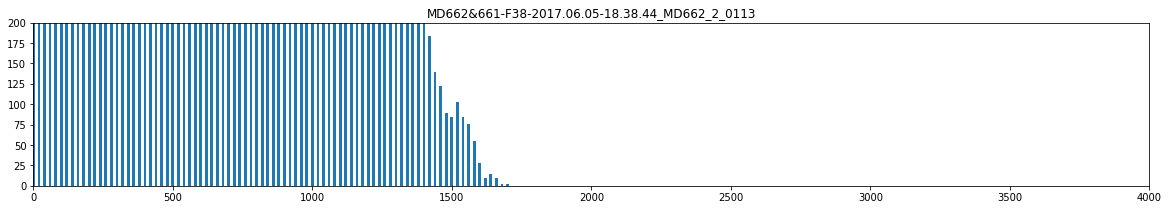

In [66]:
for fn in metadata_cache['valid_filenames'][stack][10:20:10]:
    if fn.split('-')[1][0] == 'F':
        plt.figure(figsize=(20,3));
        plt.bar(np.arange(0,4000,20)[:-1], hists[fn], width=10);
#         plt.bar(np.arange(0,4000,20)[:-1], np.log10(hists[fn]), width=10);
        plt.xlim([0,4000]);
#         fig, axes = plt.subplots(2,1, figsize=(20,5), sharex=True);
#         axes[0].bar(np.arange(0,4000,20)[:-1], hists[fn], width=10);
        # axes[1].bar(np.arange(0,4000,20)[:-1], np.log10(hists[fn]), width=10);
        plt.ylim([0, 200])
        plt.title(fn);
        plt.show();

# Take one image

In [5]:
# fn = 'MD657-F40-2017.02.18-04.41.42_MD657_1_0118'
fn = 'MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178'

In [6]:
img = DataManager.load_image_v2(stack=stack, prep_id=2, resol='lossless', fn=fn)
img_cropped = img[:, :, label_channel]

rm -rf "/shared/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep2_lossless.tif" && mkdir -p "/shared/CSHL_data_processed/MD662/MD662_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep2_lossless.tif" "/shared/CSHL_data_processed/MD662/MD662_prep2_lossless/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep2_lossless.tif"


/usr/local/lib/python2.7/dist-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
/usr/local/lib/python2.7/dist-packages/skimage/external/tifffile/tifffile.py:2546: UserWarning: unpack: string size must be a multiple of element size
  warnings.warn("unpack: %s" % e)


In [7]:
viz = np.zeros(img_cropped.shape, np.uint8)
for y, x in zip(*np.where(img_cropped > 500)):
    cv2.circle(viz, (x,y), 5, color=(255,255,255))    

In [12]:
display_image(viz)

/shared/MouseBrainAtlas/preprocess/tmp.jpg

In [ ]:
for fn in metadata_cache['valid_filenames'][stack]:
    if fn.split('-')[1][0] == 'F':
        img = DataManager.load_image(stack=stack, version='cropped_tif', resol='thumbnail', fn=fn)
#         img_cropped = img[:, :, label_channel]
#         img_cropped = img[:, :, label_channel].astype(np.int) - img[:, :, 2].astype(np.int)
        
        plt.figure(figsize=(20,20));
        plt.imshow(img[:, :, label_channel], plt.cm.gray, vmin=0, vmax=255);

        plt.figure(figsize=(20,20));
        plt.imshow(img[:, :, label_channel] > 100, plt.cm.gray, vmin=0, vmax=1);
        plt.show();
    
#         plt.figure();
#         plt.imshow(img_cropped)
#         plt.show();
        
#         ys, xs = np.where(img_cropped)
#         plt.figure();
#         plt.scatter(xs, ys, s=1);
#         plt.title(fn);
#         plt.xlim(0, 862);
#         plt.ylim(0, 530);
#         plt.show();

In [42]:
# Count bright pixels on each section.

for fn in metadata_cache['valid_filenames'][stack]:
    if fn.split('-')[1][0] == 'F':
        img = DataManager.load_image(stack=stack, version='cropped_16bit', resol='lossless', fn=fn)
        img_cropped = img[:, :, label_channel]
        print fn, np.count_nonzero(img_cropped > 500)

MD657-F13-2017.02.17-20.12.13_MD657_3_0039 15871
MD657-F14-2017.02.17-20.29.47_MD657_1_0040 201
MD657-F14-2017.02.17-20.29.47_MD657_2_0041 149140
MD657-F14-2017.02.17-20.29.47_MD657_3_0042 73602
MD657-F15-2017.02.17-20.46.06_MD657_1_0043 169


KeyboardInterrupt: 

# Take one region

In [235]:
fn, x, y, w, h = examples[stack][2]
# print x, y, w, h 
x, y, w, h = (3000, 3000, 15000, 15000)
print fn

MD662&661-F62-2017.06.06-04.35.55_MD662_2_0185


In [227]:
img = DataManager.load_image_v2(stack=stack, prep_id=2, resol='lossless', fn=fn)
img_cropped = img[y:y+h, x:x+w, label_channel]
# print np.count_nonzero(img_cropped > 500)

# fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,6));
# axes[0].hist(img_cropped.flatten(), bins=1000, log=False);
# axes[1].hist(img_cropped.flatten(), bins=1000, log=True);
# plt.xlabel('Intensity');
# plt.suptitle('Distribution of intensity');
# plt.show();

# Method 1/2

In [7]:
# Casting input image to gaussian() from uint to np.float is important, otherwise the numerical result is wrong!

img_cropped_smoothed = gaussian(img_cropped.astype(np.float), 2)
gy, gx = np.gradient(img_cropped_smoothed)
g = np.sqrt(gy**2 + gx**2)

# gy, gx = np.gradient(img_cropped.astype(np.float))
# g = np.sqrt(gy**2 + gx**2)

# plt.figure(figsize=(20,20));
# plt.imshow(g, cmap=plt.cm.gray, vmin=0, vmax=0.001);
# plt.show();

# Method 1

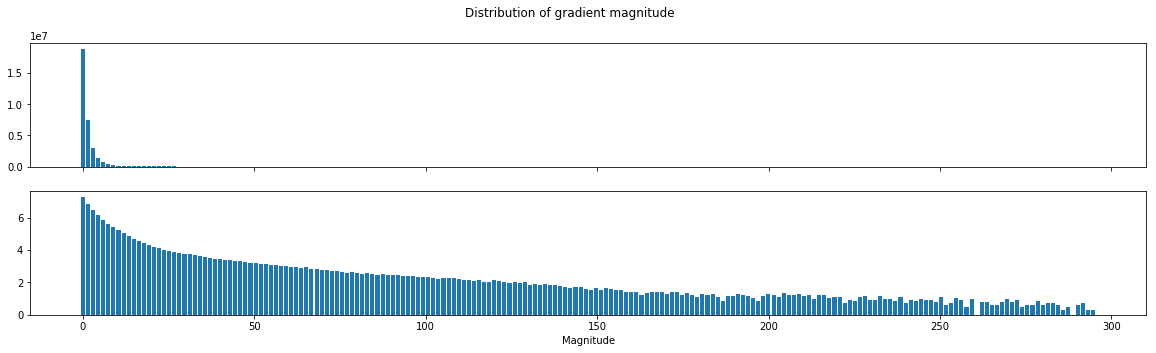

In [50]:
g_hist, g_bins = np.histogram(g.flatten(), bins=200)

fig, axes = plt.subplots(2, 1, figsize=(20,5), sharex=True);
axes[0].bar(g_bins[:-1], g_hist, width=(g_bins[1]-g_bins[0])*.8);
axes[1].bar(g_bins[:-1], np.log10(g_hist), width=(g_bins[1]-g_bins[0])*.8);
plt.xlabel('Magnitude');
plt.suptitle('Distribution of gradient magnitude');
plt.show();

# fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,6));
# axes[0].hist(g.flatten(), bins=200, log=False);
# axes[1].hist(g.flatten(), bins=200, log=True);
# plt.xlabel('Gradient');
# plt.suptitle('Distribution of gradient magnitude');
# plt.show();

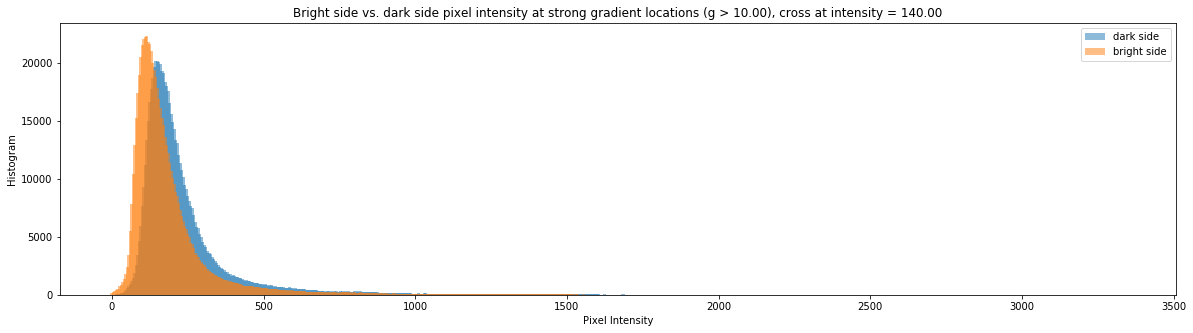

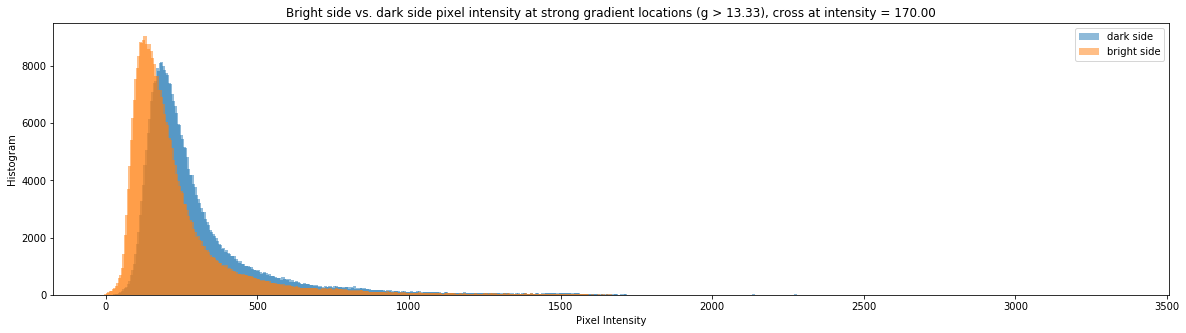

Exception KeyboardInterrupt in <function remove at 0x7f231856d1b8> ignored


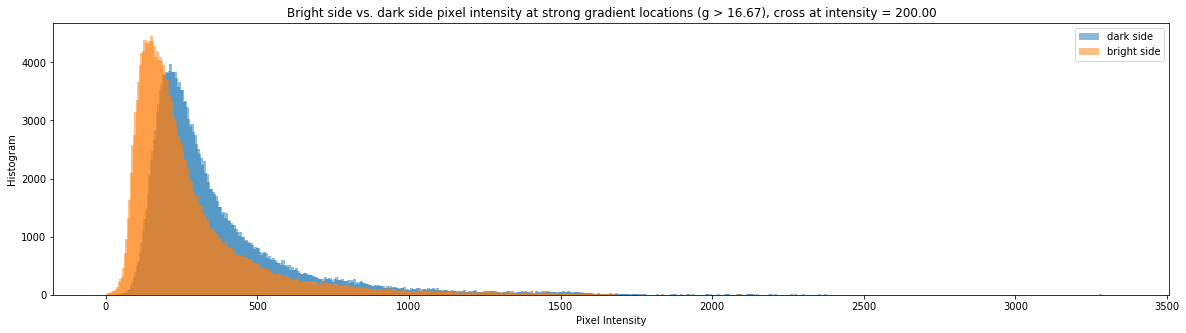

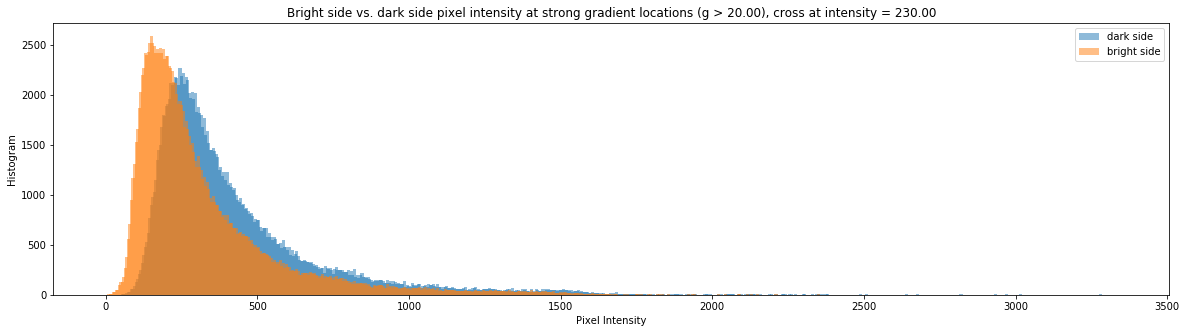

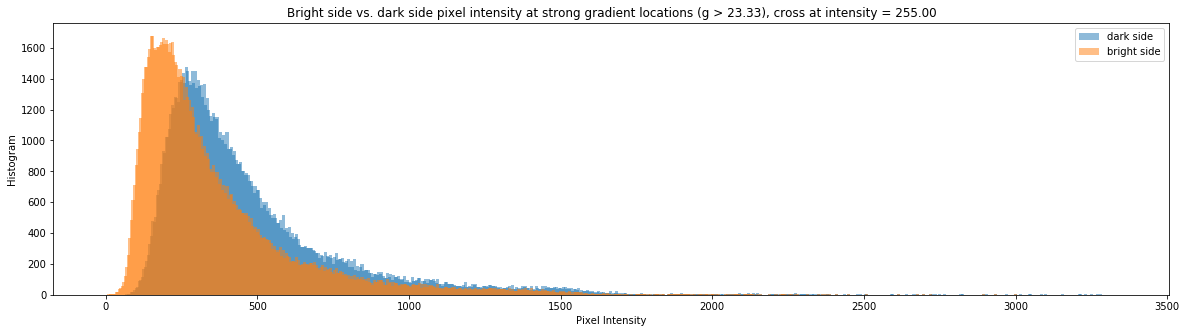

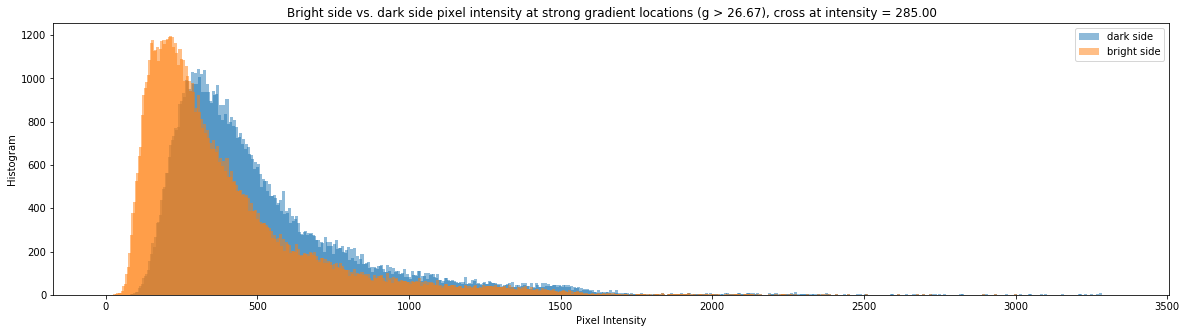

KeyboardInterrupt: 

In [51]:
# gradient_threshold = np.percentile(g, 99)
# print 'gradient_threshold', gradient_threshold

for gradient_threshold in np.linspace(10, 40, 10):

    neg = []
    pos = []
    for y, x in zip(*np.where(g > gradient_threshold)):    
        gn = np.linalg.norm([gx[y,x], gy[y,x]])
        gxn = gx[y,x] / gn
        gyn = gy[y,x] / gn
        try:
            neg.append(img_cropped[int(np.round(y + gyn)), int(np.round(x + gxn))])
            pos.append(img_cropped[int(np.round(y - gyn)), int(np.round(x - gxn))])
        except Exception as e:
            pass
#             print e

    m = max(np.max(neg), np.max(pos))
    neg_counts, neg_bins = np.histogram(neg, bins=np.arange(0, m, 5))
    pos_counts, pos_bins = np.histogram(pos, bins=np.arange(0, m, 5))

    thresh = neg_bins[np.where(neg_counts > pos_counts)[0][0]]
    
    plt.figure(figsize=(20,3));
    plt.bar(neg_bins[:-1], neg_counts, width=10, alpha=.5, label='dark side');
    plt.bar(pos_bins[:-1], pos_counts, width=10, alpha=.5, label='bright side');
    plt.title('Bright side vs. dark side pixel intensity at strong gradient locations (g > %.2f), cross at intensity = %.2f' % (gradient_threshold, thresh));
    plt.ylabel('Histogram');
    plt.xlabel('Pixel Intensity');
    plt.legend();
    plt.show();

# Method 2

In [48]:
scores = {}
for th in range(500, 3000, 50):
    img_bin = img_cropped > th
    img_bin = remove_small_objects(median(binary_closing(img_bin, selem=disk(3)), selem=disk(9)) > 0, min_size=1000, connectivity=2)
    
    gby, gbx = np.gradient(img_bin.astype(np.float))
    nz = (gby != 0) | (gbx != 0)
#     gb = np.sqrt(gby**2 + gbx**2)
#     nz = gb != 0
    
#     plt.figure(figsize=(20,20));
# #     plt.imshow(img_bin, plt.cm.gray);
#     plt.imshow(g, cmap=plt.cm.gray);
#     nzy, nzx = np.where(nz)
#     plt.scatter(nzx, nzy, s=1);
#     plt.title('threshold = %d' % th);
    
#     plt.show();
    scores[th] = np.count_nonzero(nz & (g > .0005))

/usr/local/lib/python2.7/dist-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


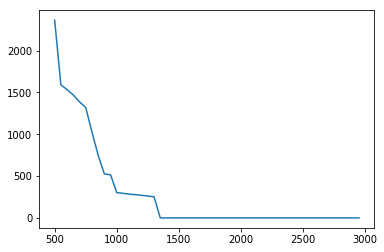

In [49]:
keys, values = zip(*sorted(scores.items()))
plt.plot(keys, values);

# Method 3

In [8]:
thresh = threshold_otsu(img_cropped)
print thresh

119


# Method 4

In [ ]:
# th = np.percentile(img_cropped.flatten(), 99)

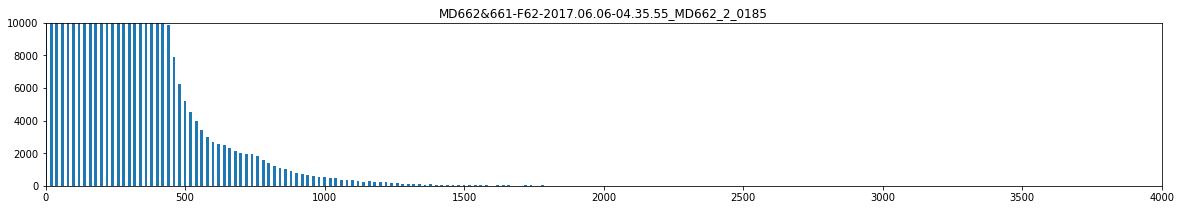

In [236]:
counts, bins = np.histogram(img_cropped.flatten(), bins=np.arange(0,4000,20))
plt.figure(figsize=(20,3));
plt.bar(np.arange(0,4000,20)[:-1], counts, width=10);
#         plt.bar(np.arange(0,4000,20)[:-1], np.log10(hists[fn]), width=10);
plt.xlim([0,4000]);
plt.ylim([0,10000])
plt.title(fn);
plt.show();

# cumdist = np.cumsum(counts) / float(counts.sum())
# plt.figure();
# plt.plot(np.arange(0,4000,20)[:-1], cumdist);
# plt.show();

In [237]:
a = np.arange(0,4000,20)[np.where(np.diff(counts) > 0)[0]]
thresh = a[np.where(a > 400)[0][0]]
print thresh

980


# Method 5

In [ ]:
entropy_allThresh = {}
activity_allThresh = {}

for th in np.arange(1000, 100, -100):
    img_bin = img_cropped > th
        
#     plt.figure(figsize=(20,20));
#     plt.imshow(img_bin, plt.cm.gray);
#     plt.title('th = %d' % th)
#     plt.show();
    
    xs, ys = np.where(img_bin)
    hist2d, _, _ = np.histogram2d(xs, ys, [np.arange(0, img_bin.shape[1], 100), np.arange(0, img_bin.shape[0], 100)])
    hist2d_density = hist2d/hist2d.sum()
    ent = -np.sum(hist2d_density * np.log(hist2d_density + 1e-10))
    
    entropy_allThresh[th] = ent

keys, values = zip(*sorted(entropy_allThresh.items()))
plt.plot(keys, values);
plt.xlabel('Threshold');
plt.ylabel('Entropy');

# After finding a threshold

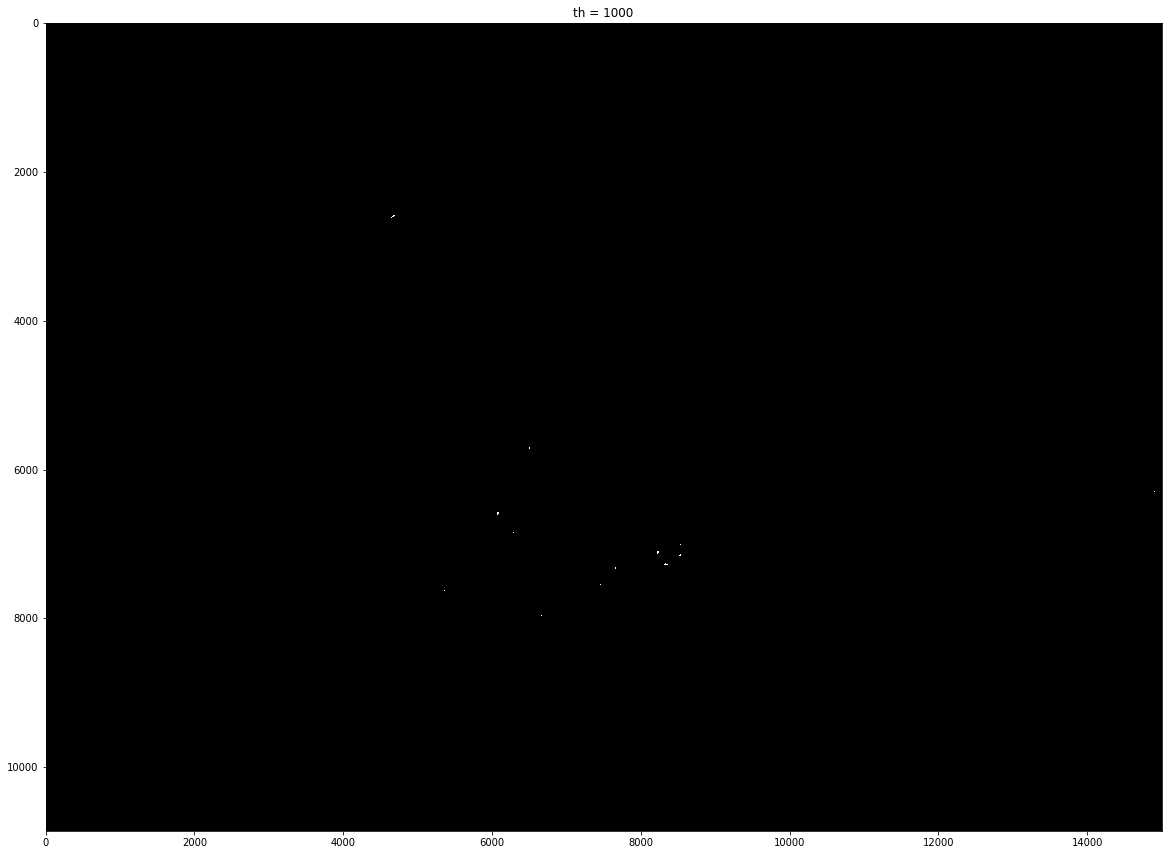

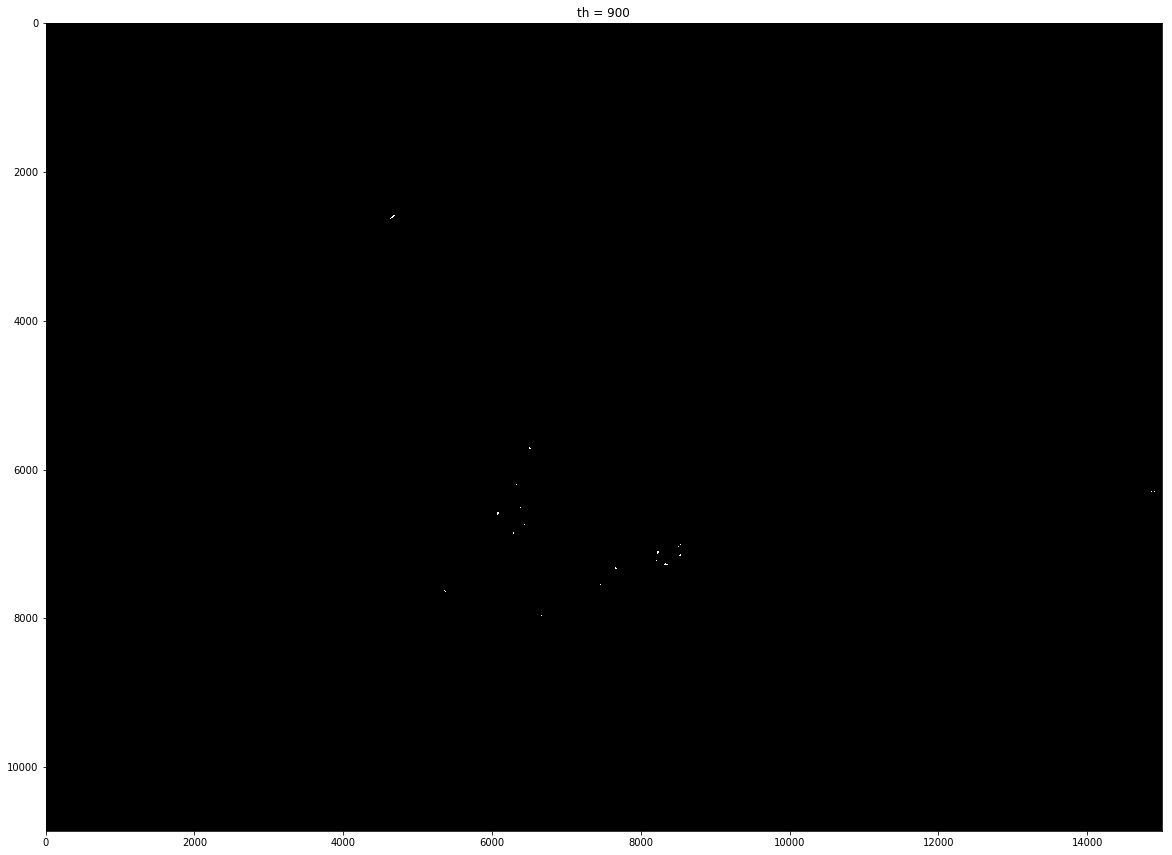

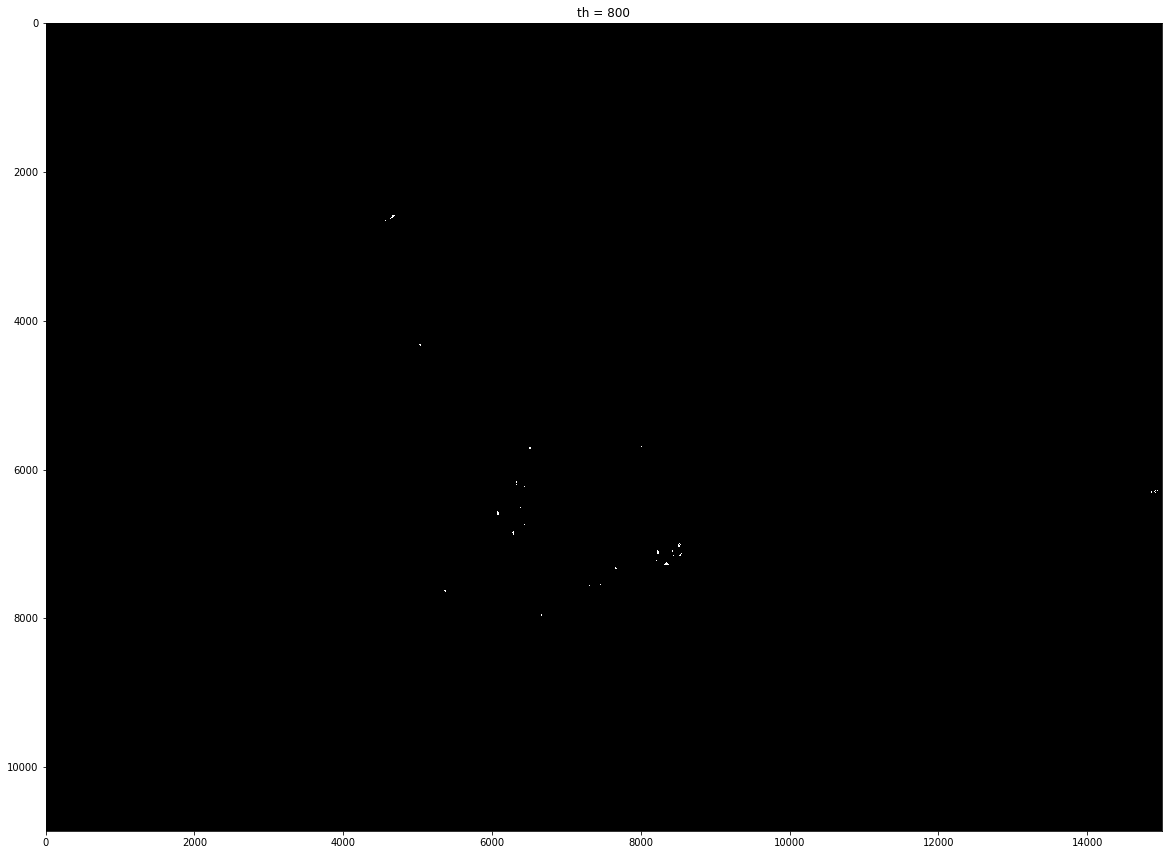

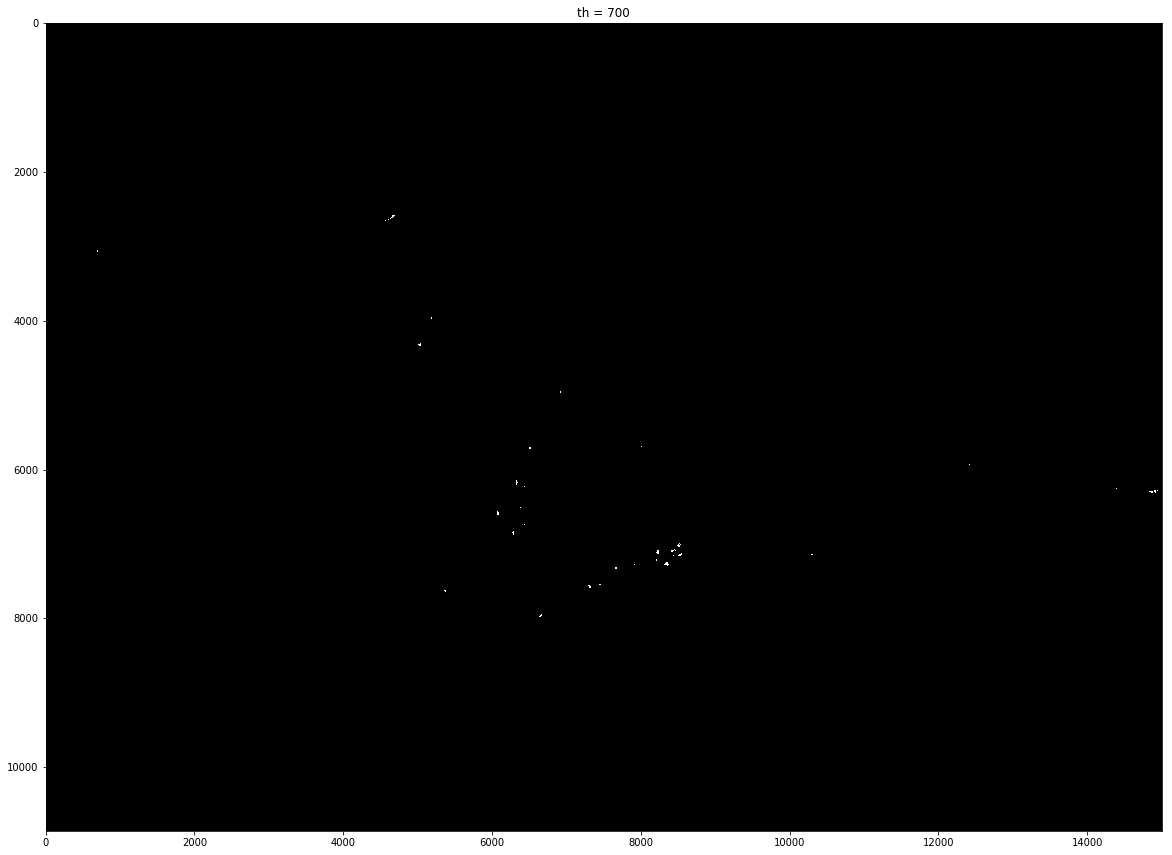

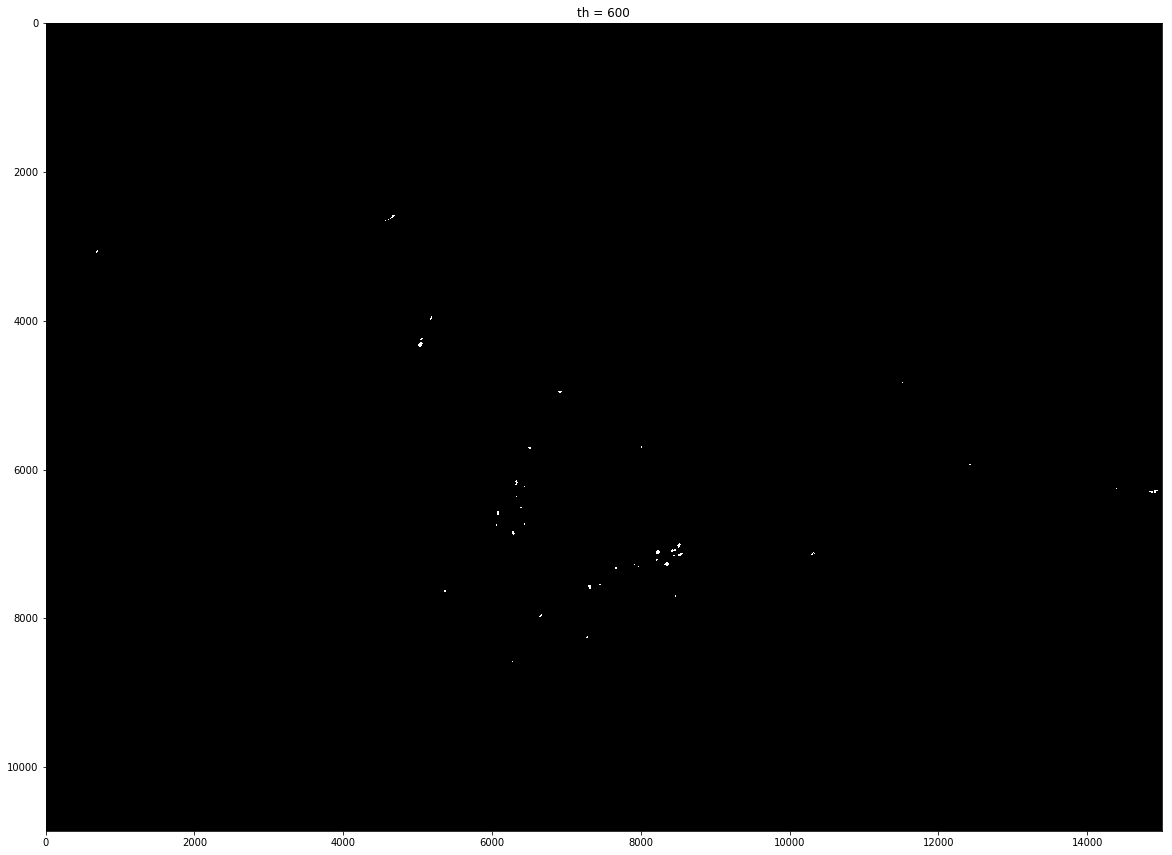

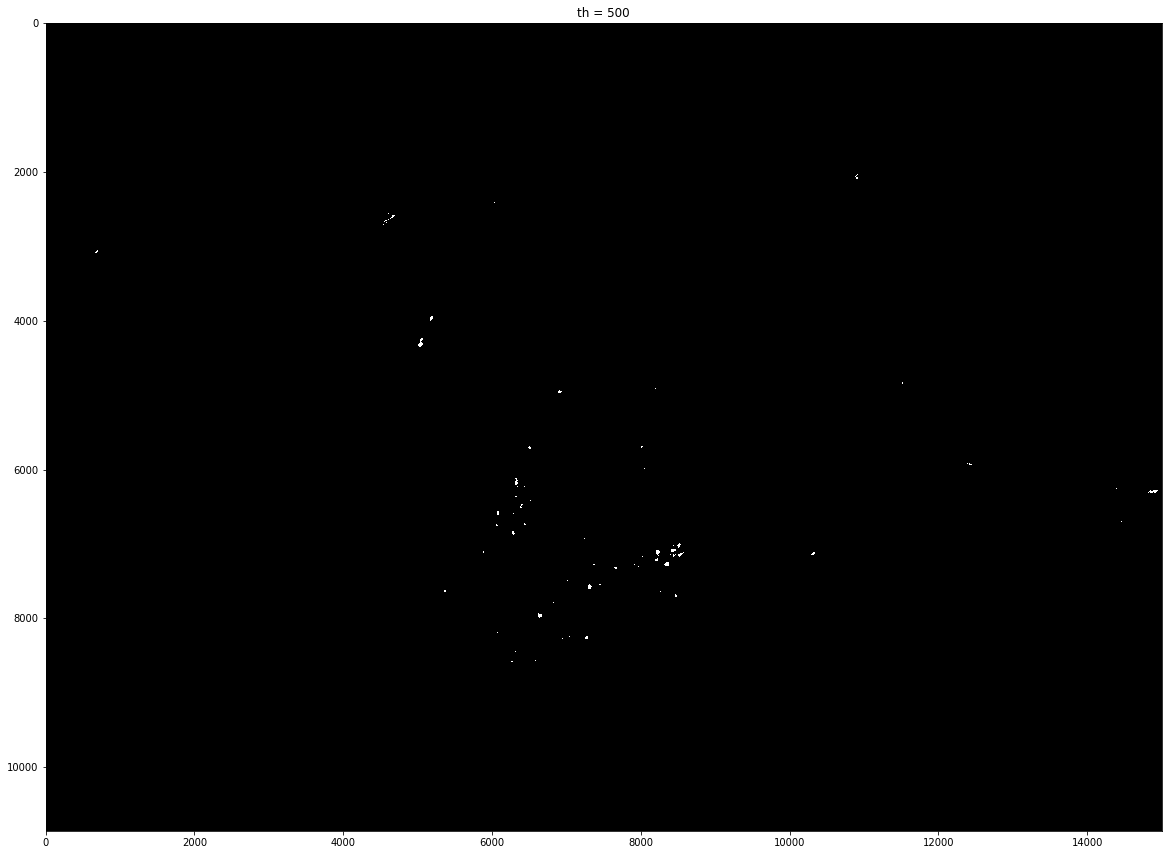

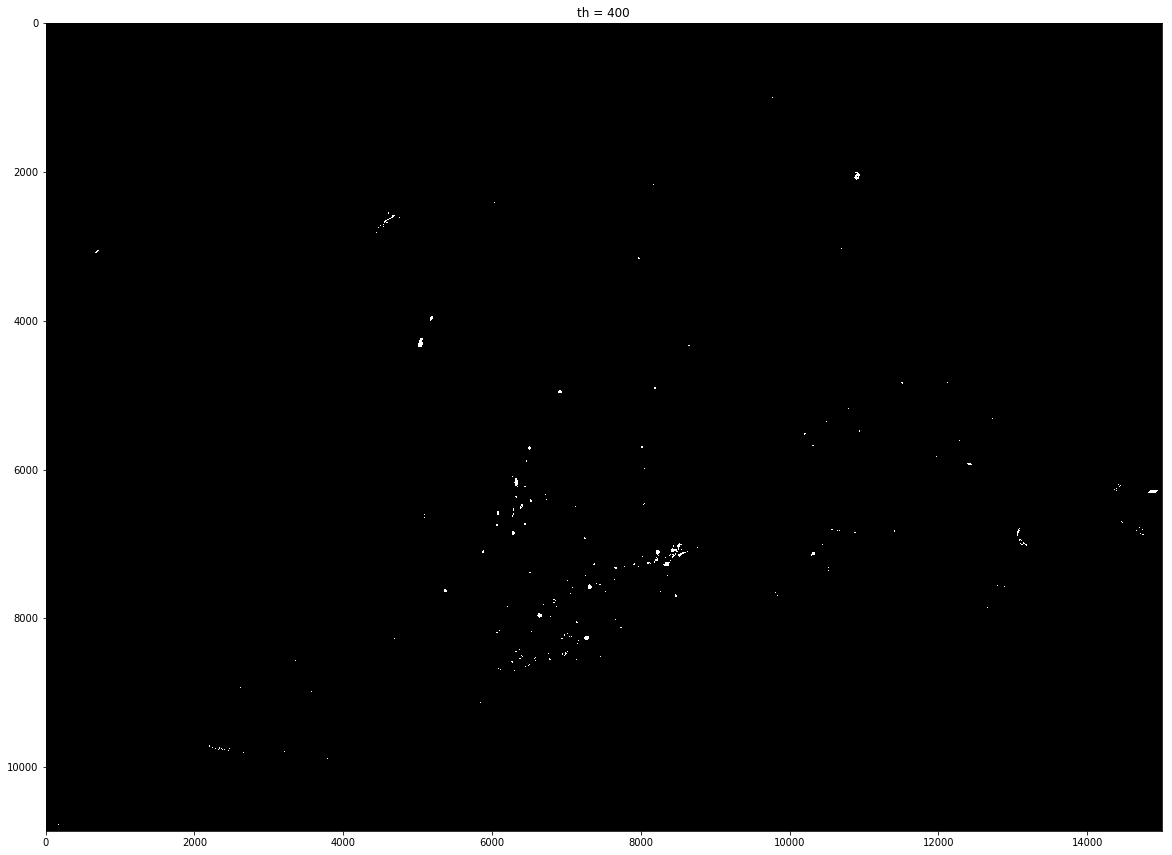

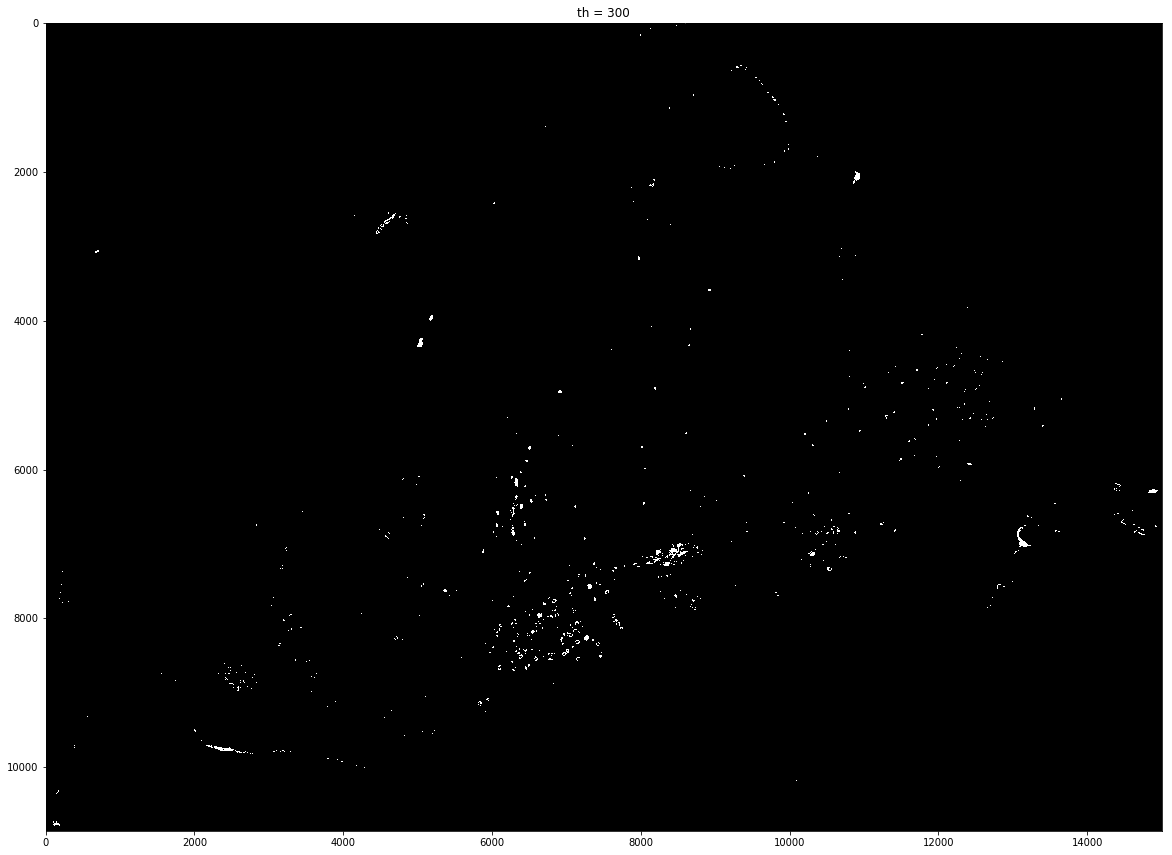

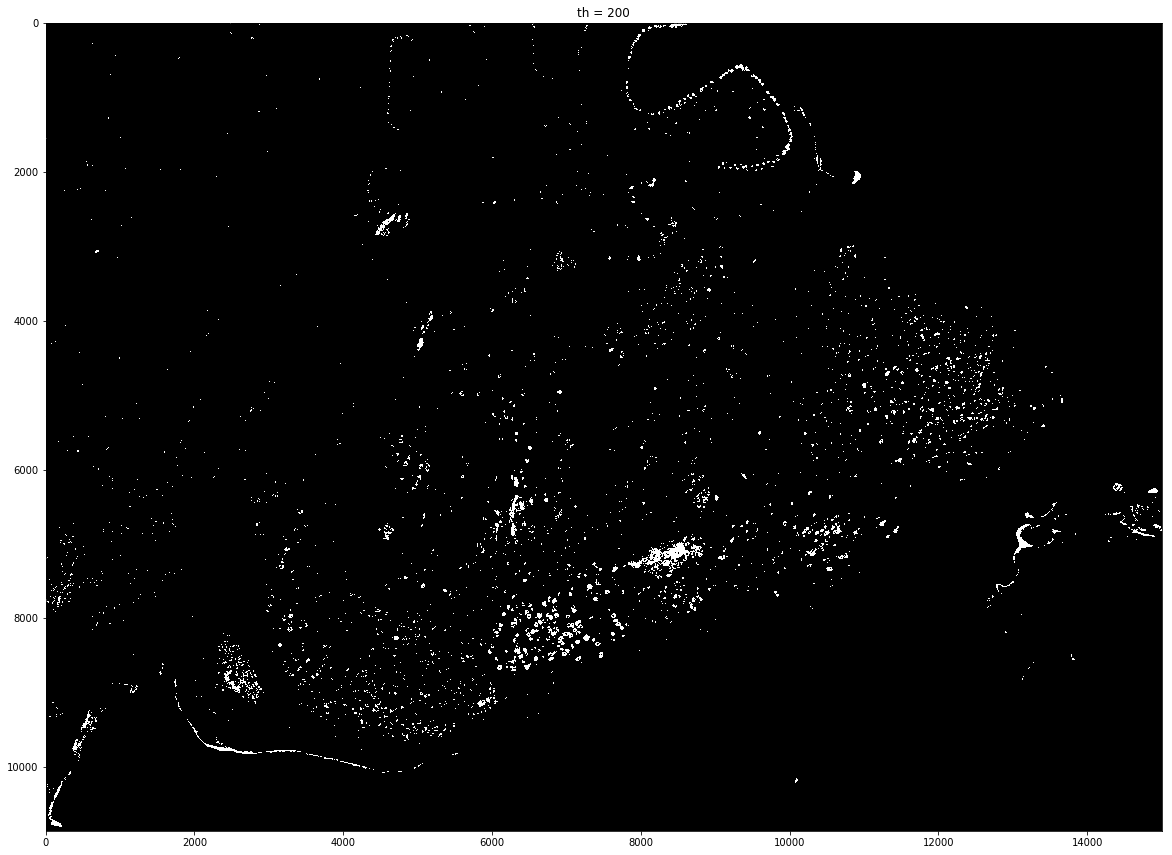

In [254]:
for th in np.arange(1000, 100, -100):
    img_bin = img_cropped > th
    
    plt.figure(figsize=(20, 20));
    plt.imshow(img_bin, plt.cm.gray);
    plt.title('th = %d' % th)
    plt.show();

In [238]:
print thresh
img_bin = img_cropped > thresh

980


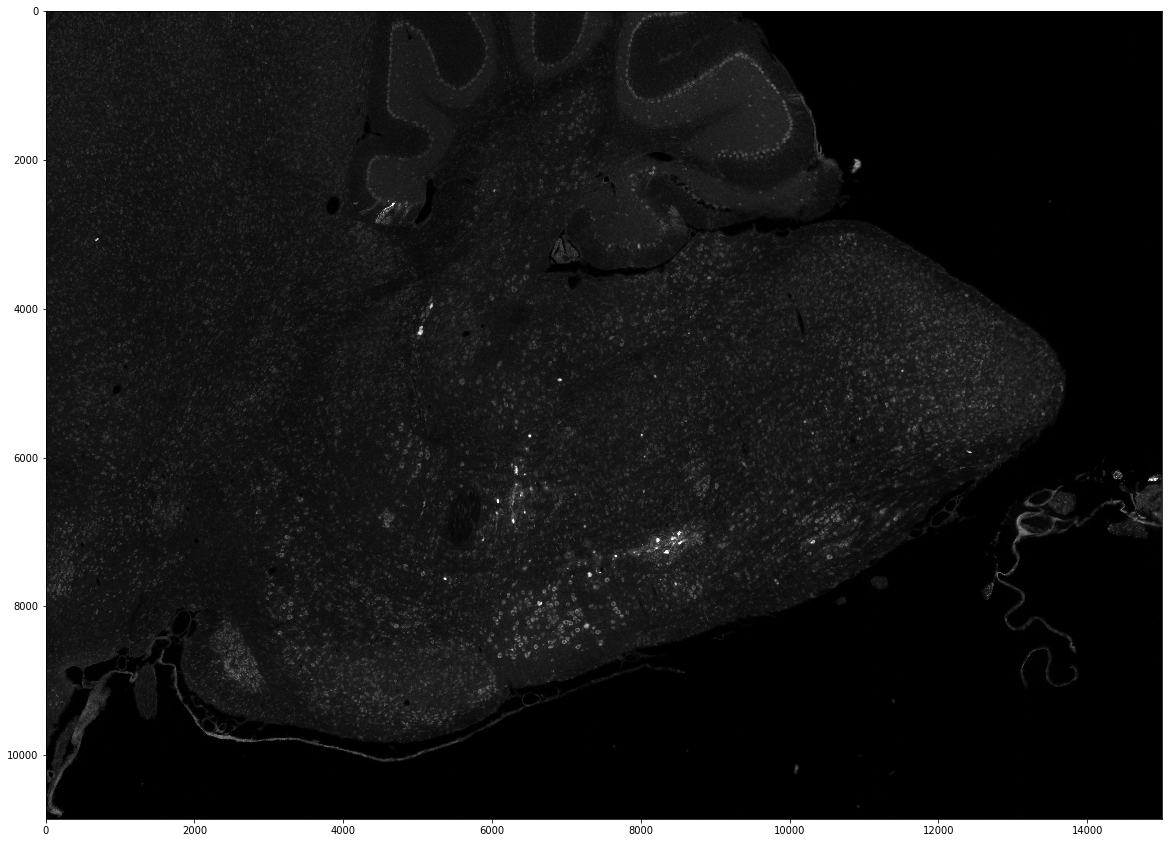

In [239]:
plt.figure(figsize=(20,20));
plt.imshow(rescale_intensity(img_cropped, in_range=(0,900), out_range=np.uint8), cmap=plt.cm.gray);
plt.show();

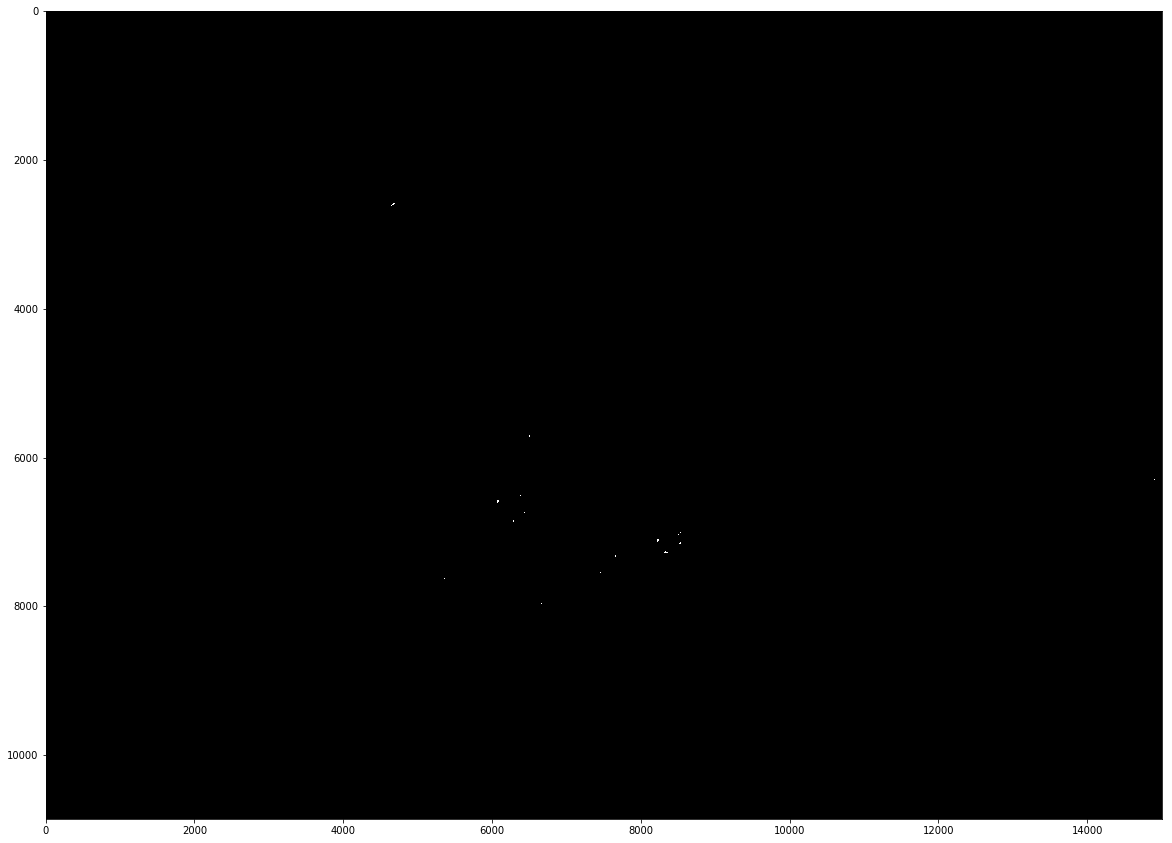

In [240]:
plt.figure(figsize=(20,20));
plt.imshow(img_bin, plt.cm.gray);

In [241]:
img_bin4 = binary_closing(img_bin, selem=disk(3))

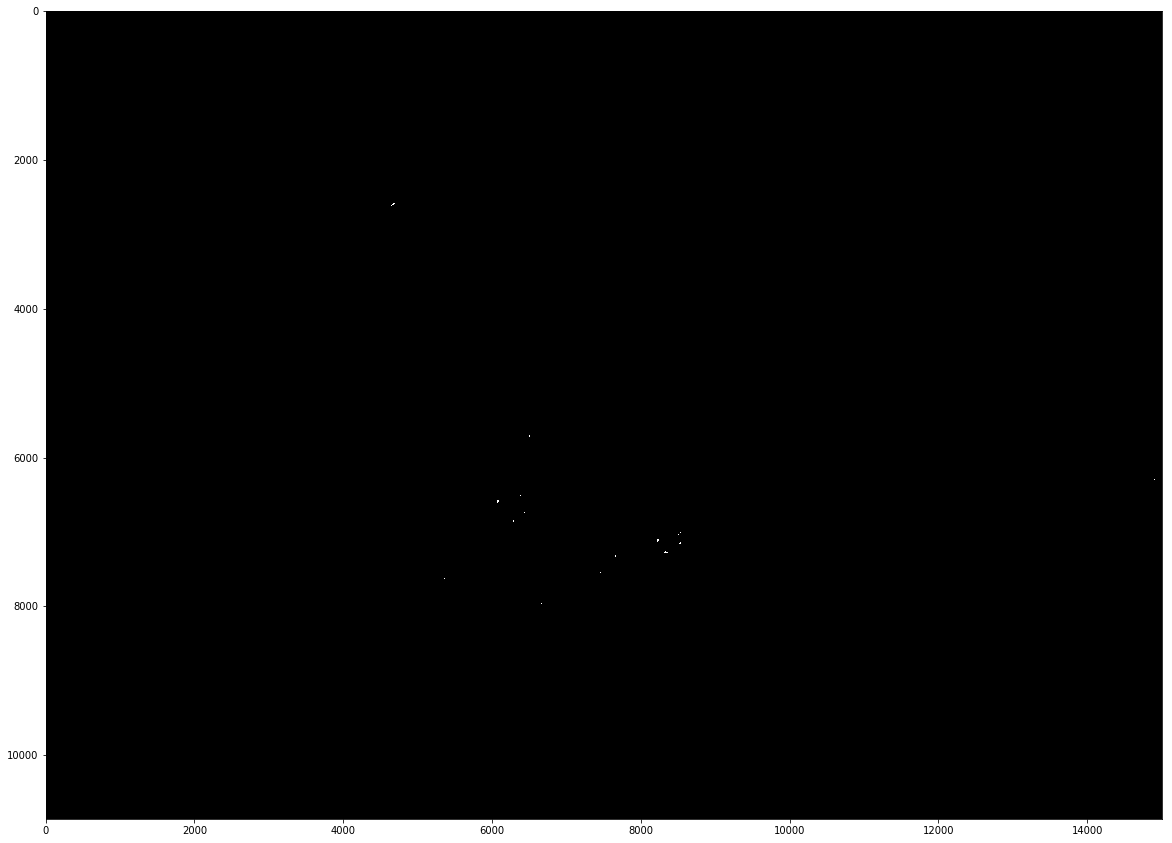

In [242]:
plt.figure(figsize=(20,20));
plt.imshow(img_bin4, plt.cm.gray);

In [245]:
img_bin3 = remove_small_objects(img_bin4 > 0, min_size=200, connectivity=2)

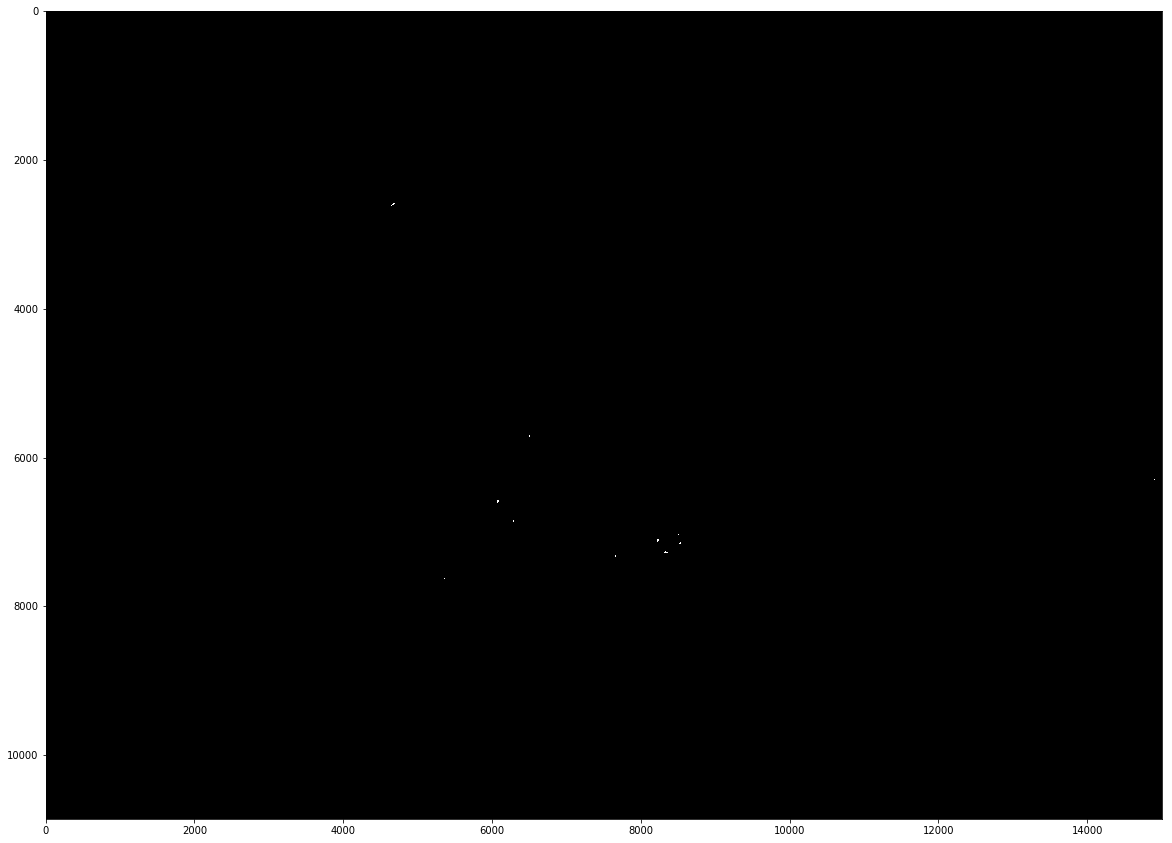

In [246]:
plt.figure(figsize=(20,20));
plt.imshow(img_bin3, plt.cm.gray);

In [247]:
regions = regionprops(label(img_bin3))

In [248]:
valid_regions = []
for i, r in enumerate(regions):
    valid_regions.append((r.centroid[::-1], r.equivalent_diameter))

In [249]:
img_cropped_rescaled = rescale_intensity(img_cropped, in_range=(0,thresh), out_range=np.uint8).astype(np.uint8)

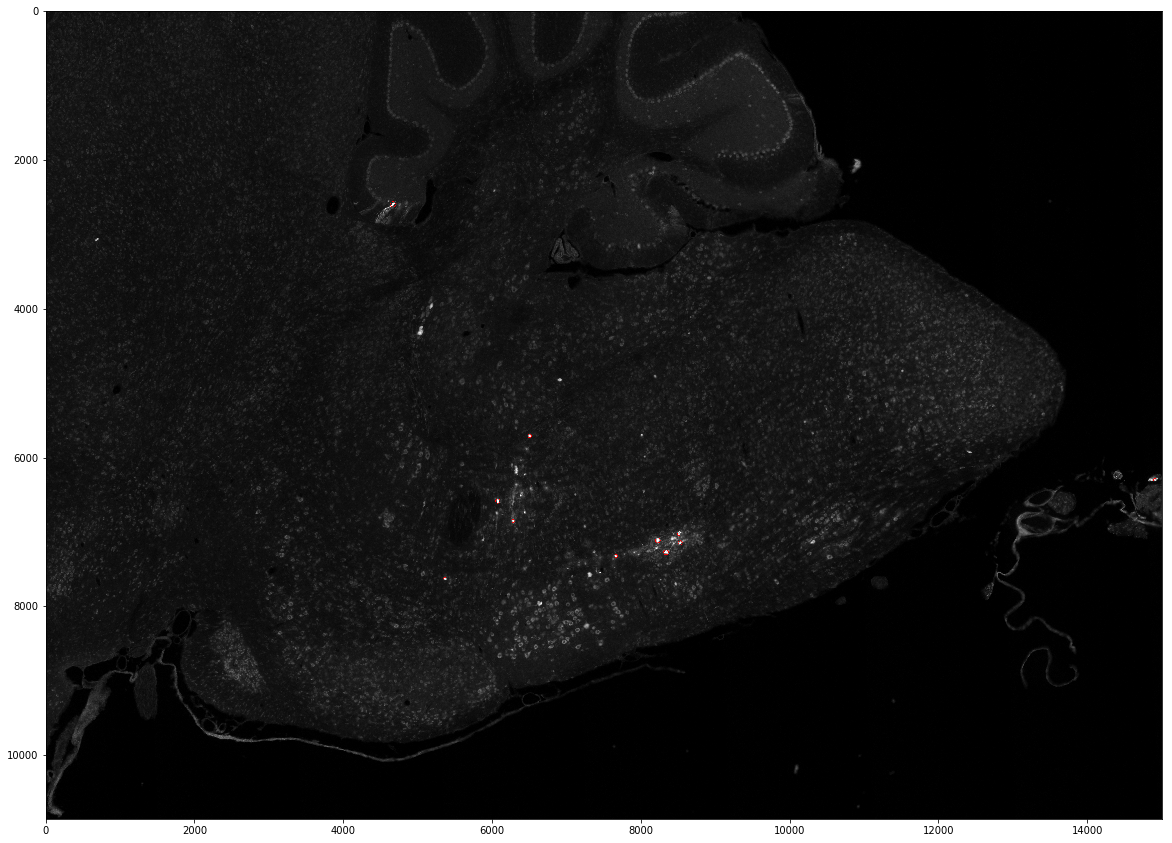

In [250]:
viz = gray2rgb(img_cropped_rescaled)
for c, r in valid_regions:
    cv2.circle(viz, (int(c[0]),int(c[1])), int(r), (255,0,0), 5)
    
plt.figure(figsize=(20, 20));
plt.imshow(viz);

In [253]:
display_image(viz[::4,::4])

/shared/MouseBrainAtlas/preprocess/tmp.jpg

# Save labeled neurons

In [3]:
metadata_cache['valid_filenames']['MD658']

['MD658-N18-2017.03.31-17.34.22_MD658_2_0053',
 'MD658-F18-2017.04.04-19.29.18_MD658_2_0053',
 'MD658-N18-2017.03.31-17.34.22_MD658_3_0054',
 'MD658-F18-2017.04.04-19.29.18_MD658_3_0054',
 'MD658-N19-2017.03.31-17.38.48_MD658_1_0055',
 'MD658-F19-2017.04.12-19.31.00_MD658_1_0055',
 'MD658-N19-2017.03.31-17.38.48_MD658_2_0056',
 'MD658-F19-2017.04.12-19.31.00_MD658_2_0056',
 'MD658-N19-2017.03.31-17.38.48_MD658_3_0057',
 'MD658-F19-2017.04.04-19.44.45_MD658_3_0057',
 'MD658-N20-2017.03.31-17.43.13_MD658_1_0058',
 'MD658-F20-2017.04.12-19.48.14_MD658_1_0058',
 'MD658-N20-2017.03.31-17.43.13_MD658_2_0059',
 'MD658-F20-2017.04.04-20.00.33_MD658_2_0059',
 'MD658-N20-2017.03.31-17.43.13_MD658_3_0060',
 'MD658-F20-2017.04.04-20.00.33_MD658_3_0060',
 'MD658-N21-2017.03.31-17.47.46_MD658_1_0061',
 'MD658-F21-2017.04.04-20.15.37_MD658_1_0061',
 'MD658-N21-2017.03.31-17.47.46_MD658_2_0062',
 'MD658-F21-2017.04.04-20.15.37_MD658_2_0062',
 'MD658-N22-2017.03.31-17.51.00_MD658_1_0064',
 'MD658-F22-2

In [3]:
stack = 'MD658'
# fn, x_ll, y_ll, r_um
# labeled_neurons = {'MD658-F43-2017.04.05-02.10.06_MD658_1_0127': [(12228, 10988, 5), (12328, 10888, 5)],
#                    'MD658-F38-2017.04.05-00.43.15_MD658_1_0112': [(7200 ,6464, 20), (7000 ,6264, 10)],
#                    'MD658-F33-2017.04.04-23.12.27_MD658_1_0097': [(6912 ,7392, 20), (6612, 7492, 20)],
#                    'MD658-F60-2017.04.05-06.47.55_MD658_2_0179': [(7360 ,6368, 10), (7160 ,6168, 20)],
#                    'MD658-F61-2017.04.05-07.03.26_MD658_2_0182': [(10528, 9536, 10), (10728, 9736, 10)],
                   'MD658-F30-2017.04.04-22.22.02_MD658_2_0089': [(244*32, 259*32, 10), (231*32, 295*32, 10), (269*32, 287*32, 10)],
                     'MD658-F31-2017.04.04-22.39.14_MD658_1_0091': [(236*32, 261*32, 10), (249*32, 310*32, 10), (285*32, 277*32, 10)],

                  }

In [6]:
for fn, neurons in labeled_neurons.iteritems():        
    fp = DataManager.get_labeled_neurons_filepath(stack, fn=fn)
    create_parent_dir_if_not_exists(fp)
    save_pickle(neurons, fp)
    upload_to_s3(fp)

aws s3 cp /shared/CSHL_labeled_neurons/MD658/MD658-F61-2017.04.05-07.03.26_MD658_2_0182/MD658-F61-2017.04.05-07.03.26_MD658_2_0182.pkl s3://mousebrainatlas-data/CSHL_labeled_neurons/MD658/MD658-F61-2017.04.05-07.03.26_MD658_2_0182/MD658-F61-2017.04.05-07.03.26_MD658_2_0182.pkl


Child returned 0
0.48 seconds.


aws s3 cp /shared/CSHL_labeled_neurons/MD658/MD658-F33-2017.04.04-23.12.27_MD658_1_0097/MD658-F33-2017.04.04-23.12.27_MD658_1_0097.pkl s3://mousebrainatlas-data/CSHL_labeled_neurons/MD658/MD658-F33-2017.04.04-23.12.27_MD658_1_0097/MD658-F33-2017.04.04-23.12.27_MD658_1_0097.pkl


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_labeled_neurons/MD658/MD658-F43-2017.04.05-02.10.06_MD658_1_0127/MD658-F43-2017.04.05-02.10.06_MD658_1_0127.pkl s3://mousebrainatlas-data/CSHL_labeled_neurons/MD658/MD658-F43-2017.04.05-02.10.06_MD658_1_0127/MD658-F43-2017.04.05-02.10.06_MD658_1_0127.pkl


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_labeled_neurons/MD658/MD658-F38-2017.04.05-00.43.15_MD658_1_0112/MD658-F38-2017.04.05-00.43.15_MD658_1_0112.pkl s3://mousebrainatlas-data/CSHL_labeled_neurons/MD658/MD658-F38-2017.04.05-00.43.15_MD658_1_0112/MD658-F38-2017.04.05-00.43.15_MD658_1_0112.pkl


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_labeled_neurons/MD658/MD658-F60-2017.04.05-06.47.55_MD658_2_0179/MD658-F60-2017.04.05-06.47.55_MD658_2_0179.pkl s3://mousebrainatlas-data/CSHL_labeled_neurons/MD658/MD658-F60-2017.04.05-06.47.55_MD658_2_0179/MD658-F60-2017.04.05-06.47.55_MD658_2_0179.pkl


Child returned 0
0.43 seconds.
